## Determining Tree Depth in DecisionTreeRegressor using Underfitting and Overfitting

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Melbourne_housing_FULL.csv')

In [4]:
data = data.dropna(axis=0)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [5]:
model_parameters=['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude','YearBuilt','BuildingArea','Landsize','Propertycount']
X = data[model_parameters]
y = data.Price
X.head(10)

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,YearBuilt,BuildingArea,Landsize,Propertycount
2,2,1.0,156.0,-37.8079,144.9934,1900.0,79.0,156.0,4019.0
4,3,2.0,134.0,-37.8093,144.9944,1900.0,150.0,134.0,4019.0
6,4,1.0,120.0,-37.8072,144.9941,2014.0,142.0,120.0,4019.0
11,3,2.0,245.0,-37.8024,144.9993,1910.0,210.0,245.0,4019.0
14,2,1.0,256.0,-37.8060,144.9954,1890.0,107.0,256.0,4019.0
18,2,1.0,220.0,-37.8010,144.9989,1900.0,75.0,220.0,4019.0
24,3,2.0,214.0,-37.8085,144.9964,2005.0,190.0,214.0,4019.0
25,2,2.0,0.0,-37.8078,144.9965,2009.0,94.0,0.0,4019.0
30,2,1.0,238.0,-37.8090,144.9976,1890.0,97.0,238.0,4019.0
32,3,2.0,113.0,-37.8056,144.9930,1880.0,110.0,113.0,4019.0


## DecisionTreeRegression Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [7]:
# values = []
# while True:
#     train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=1)
#     melbourne_model = DecisionTreeRegressor()
#     melbourne_model.fit(train_X,train_y)
#     predicted_values = melbourne_model.predict(val_X)
#     error = mean_absolute_error(val_y,predicted_values)
#     if error<240811.7916291629:
#         break
#     values.append(error)
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=1)
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X,train_y)
predicted_values = melbourne_model.predict(val_X)
error = mean_absolute_error(val_y,predicted_values)
error

247591.82763276328

**Finding a Sweet Spot Between Underfitting and Overfitting**

In [8]:
def get_mean_square_error(max_leaf_node,train_X,val_X,train_y,val_y):
    model_selection = DecisionTreeRegressor(max_leaf_nodes=max_leaf_node,random_state = 0)
    model_selection.fit(train_X,train_y)
    prediction = model_selection.predict(val_X)
    error = mean_absolute_error(val_y,prediction)
    return(error)

In [9]:
leaf= []
error = []
for i in range(10,10000,10):
    msr_error = get_mean_square_error(i,train_X,val_X,train_y,val_y)
    leaf.append(i)
    error.append(msr_error)

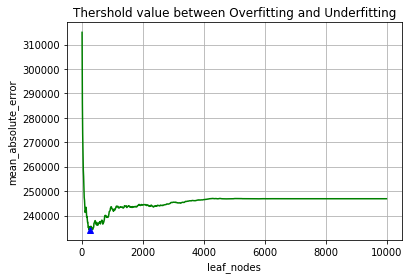

In [10]:
plt.plot(leaf,error,'g',leaf[error.index(min(error))],min(error),'b^')
plt.title('Thershold value between Overfitting and Underfitting')
plt.xlabel('leaf_nodes')
plt.ylabel('mean_absolute_error')
plt.grid(min(error))

In [11]:
p_leaf = leaf[error.index(min(error))]
print("The Sweet Spot is at: \nleaf : %d \nMeanAverageError: %d"%(leaf[error.index(min(error))],min(error)))

The Sweet Spot is at: 
leaf : 260 
MeanAverageError: 234117


**Hence Perfect leaf value for Perdection**

In [12]:
model_selection = DecisionTreeRegressor(max_leaf_nodes=p_leaf,random_state = 0)
model_selection.fit(train_X,train_y)
model_selection.predict(val_X)

array([ 579536.3877551 ,  594885.13071895, 2602133.33333333, ...,
       2165300.        ,  718292.5974026 , 1416507.95454545])

## RandomForestRegressor Model

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
model_selection_r = RandomForestRegressor(n_estimators=100,random_state = 1)
model_selection_r.fit(train_X,train_y)
predection_r = model_selection_r.predict(val_X)
mean_absolute_error(val_y,predection_r)

178858.92486884404